In [1]:
# Import required libraries and dependencies
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h",
                                                               "price_change_percentage_7d",
                                                               "price_change_percentage_14d",
                                                               "price_change_percentage_30d",
                                                               "price_change_percentage_60d",
                                                               "price_change_percentage_200d",
                                                               "price_change_percentage_1y"]])

# Review the scaled data
market_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [6]:
# Create a DataFrame with the scaled data
market_scaled = pd.DataFrame(market_scaled, columns = ["price_change_percentage_24h",
                                                               "price_change_percentage_7d",
                                                               "price_change_percentage_14d",
                                                               "price_change_percentage_30d",
                                                               "price_change_percentage_60d",
                                                               "price_change_percentage_200d",
                                                               "price_change_percentage_1y"])

# Copy the crypto names from the original data
market_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
market_scaled.set_index('coin_id', inplace=True)

# Display sample data
market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `market_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(market_scaled)
    inertia_values.append(k_model.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}
df_elbow = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379


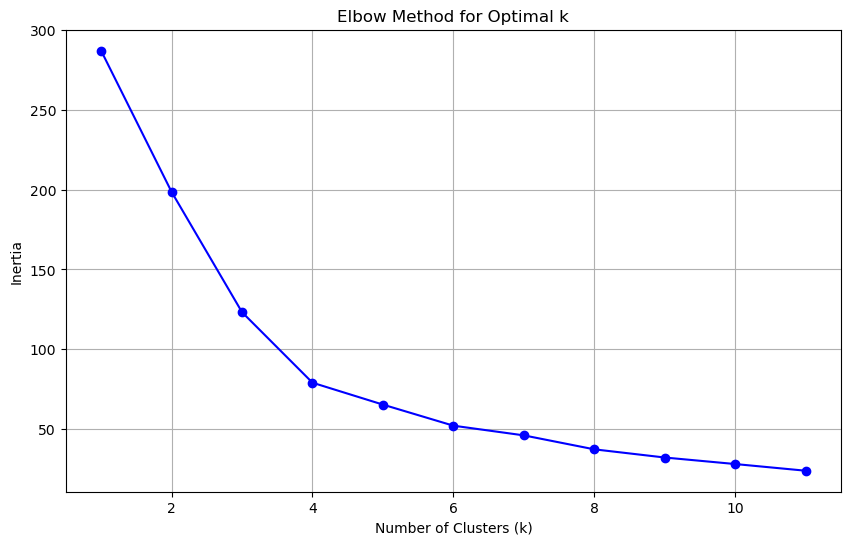

In [10]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4, random_state = 4)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(market_scaled)

KMeans(n_clusters=4, random_state=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4_clusters = model.predict(market_scaled)

# Print the resulting array of cluster values.
k_4_clusters

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0])

In [14]:
# Create a copy of the DataFrame
market_with_clusters = market_scaled.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
market_with_clusters["clusters"] = k_4_clusters

# Display sample data
market_with_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = market_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='clusters',
    hover_cols=['crypto_name'],
    width=800,
    height=500
)

# Show scatterplot
scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca = pca.fit_transform(market_scaled)

# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [20]:
# Retrieve the explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = sum(explained_variance_ratio)

# Print the total explained variance
print("Total Explained Variance:", total_explained_variance)

Total Explained Variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.50%

In [21]:
# Creating a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
df_pca = pd.DataFrame(market_pca, columns=pca_columns)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)


# Display sample data
df_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = range(1, 12)

In [23]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_values_pca:
    k_model = KMeans(n_clusters = i, random_state = 1)
    k_model.fit(df_pca)
    inertia_values_pca.append(k_model.inertia_)

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"Number of Clusters (k)": k_values_pca, "Inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

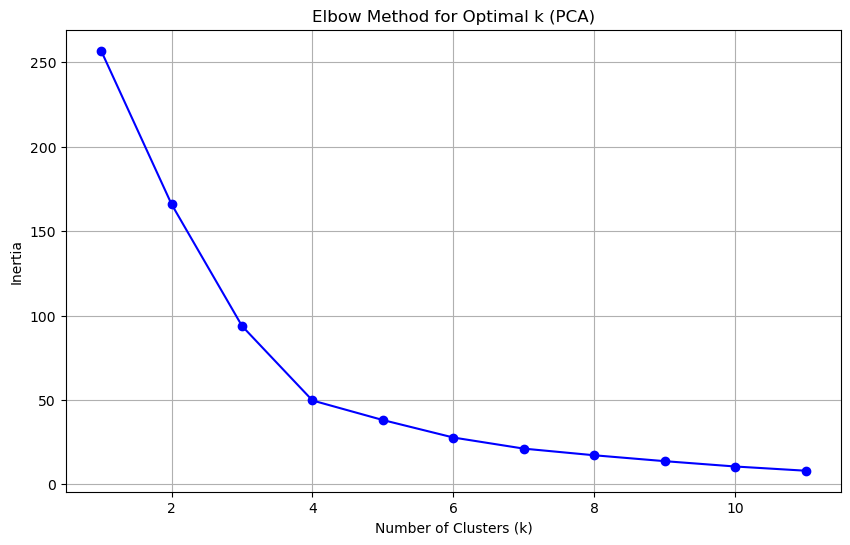

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['Number of Clusters (k)'], df_elbow_pca['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No they are the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4, random_state = 4)

In [27]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=4, random_state=4)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = model.predict(df_pca)

# Print the resulting array of cluster values.
pca_clusters

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0])

In [29]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['predicted_cluster'] = pca_clusters

# Display sample data
df_pca_with_clusters.head()

,PCA1,PCA2,PCA3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [30]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by='predicted_cluster',
    hover_cols=['crypto_name'],
    width=800,
    height=500
)

# Show the scatter plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PCA1]   (PCA2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

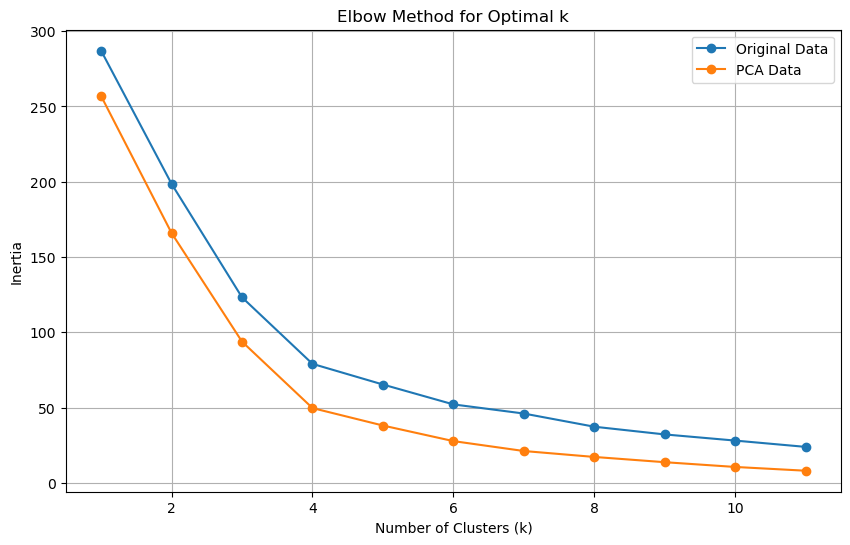

In [31]:
# Composite plot to contrast the Elbow curves
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Elbow curve for original data
ax.plot(df_elbow['k'], df_elbow['inertia'], marker='o', label='Original Data')

# Plot Elbow curve for PCA-transformed data
ax.plot(df_elbow_pca['Number of Clusters (k)'], df_elbow_pca['Inertia'], marker='o', linestyle='-', label='PCA Data')

# Set titles and labels
ax.set_title('Elbow Method for Optimal k')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia')
ax.grid(True)

# Add legend
ax.legend()

# Show plot
plt.show()

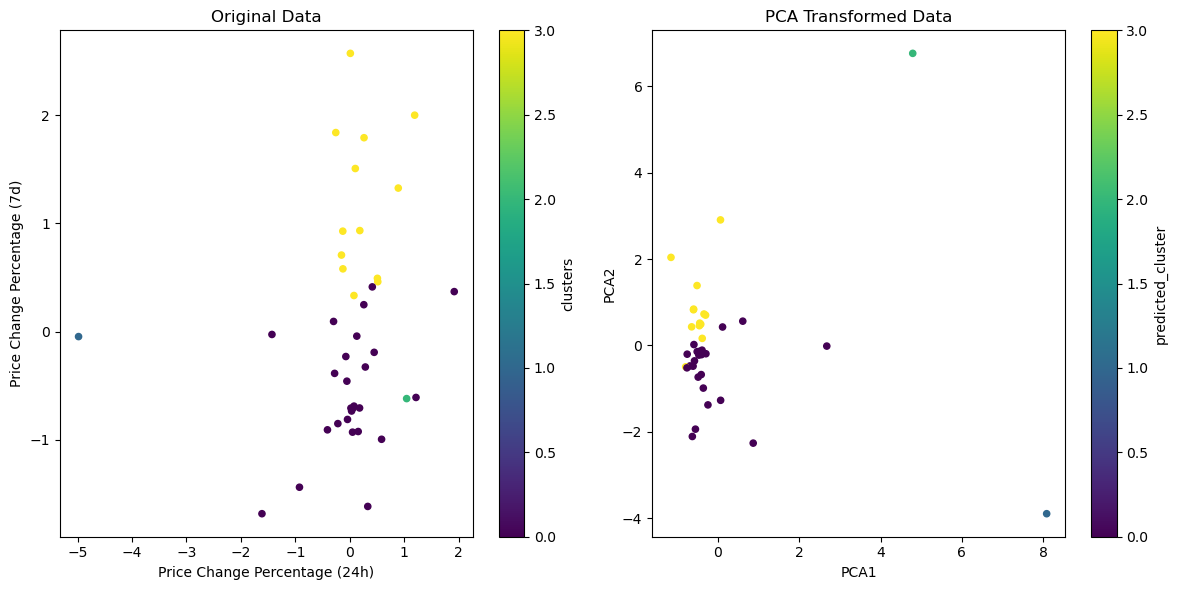

In [32]:
# Composite plot to contrast the clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for original data
market_with_clusters.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='clusters',
    cmap='viridis',
    ax=axes[0]
)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Price Change Percentage (24h)')
axes[0].set_ylabel('Price Change Percentage (7d)')

# Scatter plot for PCA Transformed data
df_pca_with_clusters.plot.scatter(
    x="PCA1",
    y="PCA2",
    c='predicted_cluster',
    cmap='viridis',
    ax=axes[1]
)
axes[1].set_title('PCA Transformed Data')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Original Data is more spread out. PCA Transformed Data is more uniform. PCA Transformed Data also identifies outlier clusters easier.